In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('udemy_data/1.03. Dummies.csv')

In [3]:
df.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [4]:
#We need to encode attendance because all the data that want to train must be numerical
df['Attendance'] = df['Attendance'].map({'No':0,'Yes':1}) #map mean as encode

In [5]:
df.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


In [6]:
df.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


<h2>Regression</h2>

In [7]:
y = df['GPA'] #dependent
x1= df[['SAT','Attendance']] #independent

In [8]:
x = sm.add_constant(x1) #more then 1 variable
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           2.19e-15
Time:                        23:27:46   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- We can see that SAT and Attendance is significant because P.|t| < 0.05
- Adj R-squared more then before 0.399 
- So the formula of GPA = 0.6493+0.0014.SAT+0.2226.Attendance (note attendance value is 0 or 1)
- plot the data

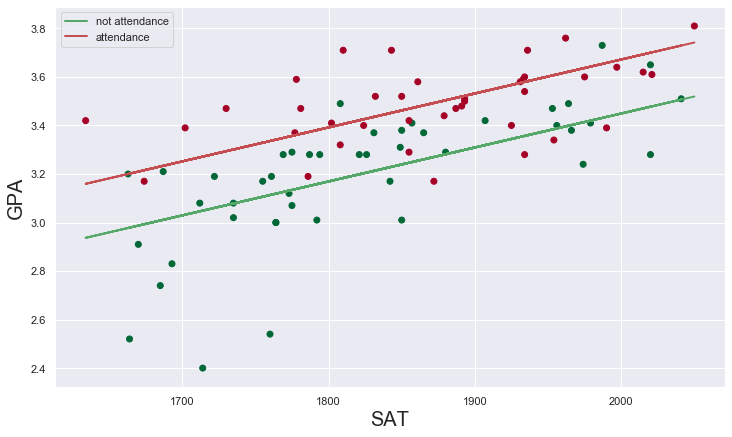

In [9]:
fig = plt.subplots(figsize=(12,7))
plt.scatter(df['SAT'],y, c= df['Attendance'], cmap ='RdYlGn_r') #we change the color of dot based on attendance
yhat_no = 0.6493+0.0014*df['SAT'] #y hat value if attendance is 0 (to create a line)
yhat_yes = 0.6493+0.0014*df['SAT']+0.2226*1 #y hat value if attendance is 1
plt.plot(df['SAT'], yhat_no, c= 'g', lw=2, label='not attendance')
plt.plot(df['SAT'], yhat_yes, c= 'r', lw=2, label='attendance')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.legend()
plt.show()

- GPA attend 0.2226 higher than not attend

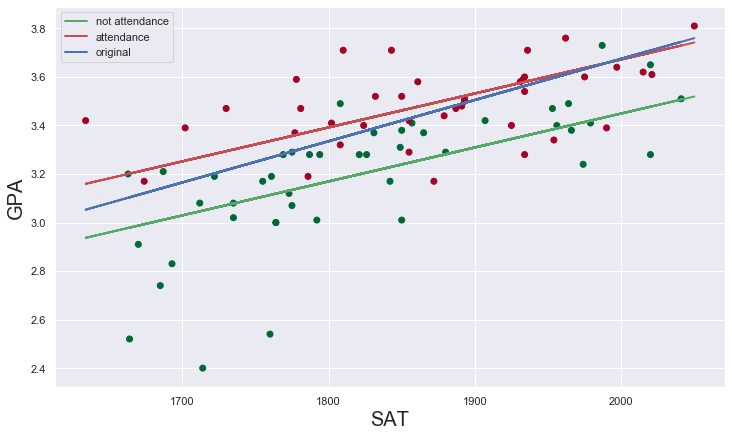

In [10]:
#if add line just GPA and SAT
fig = plt.subplots(figsize=(12,7))
plt.scatter(df['SAT'],y, c= df['Attendance'], cmap ='RdYlGn_r')
yhat_no = 0.6493+0.0014*df['SAT']
yhat_yes = 0.6493+0.0014*df['SAT']+0.2226*1
yhat = 0.275+0.0017*df['SAT'] #based on 1. simple linear regression case
plt.plot(df['SAT'], yhat_no, c= 'g', lw=2, label='not attendance')
plt.plot(df['SAT'], yhat_yes, c= 'r', lw=2, label='attendance')
plt.plot(df['SAT'], yhat, c= 'b', lw=2, label='original')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.legend()
plt.show()

<b>Predict value</b>

In [11]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [12]:
#make dataframe for 2 people bob SAT 1700, not attendance and alice 1670 attendance
new_data = pd.DataFrame({'const':1,'SAT':[1700,1670],'Attendance':[0,1]})

In [13]:
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [14]:
predict =results.predict(new_data)
predict

0    3.023513
1    3.204163
dtype: float64

In [15]:
#make easier to read
pred_data = pd.DataFrame({'GPA':predict})
join_data = new_data.join(pred_data)
join_data.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance,GPA
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
